In [9]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm
import pandas as pd

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

from sklearn.linear_model import LinearRegression

In [5]:
#Estas funciones guardan los datos en una columna
#SAVE THE DATA
def Save_Data(data, name):
    ''' Save a list data in a .csv file '''
    out = csv.writer(open(name,'a'),delimiter=',', quoting=csv.QUOTE_ALL)
    for i in data:
        out.writerow([i])


#RESTORE SAVE DATA
def Restore_data(file_name):
    ''' Restore the information .csv file in a python list '''
    data=[]
    with open(file_name, 'r') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            data.append(float(list(row)[0]))
        #reader = csv.reader(f)
        #restored_list = list(reader)[0]
        #data = [float(i) for i in restored_list]
        return data        

In [10]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

# T=1.0 ---> T=1.1

In [23]:
T10T11 = Restore_data('Delta_Energy_Temperature_v4_1.1.csv')

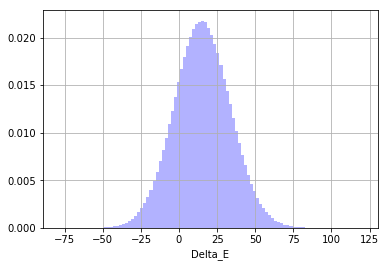

In [12]:
fig, ax = plt.subplots()
ax.hist(T10T11, 100, fc='blue', alpha=0.3, normed=True)
ax.set_xlabel('Delta_E')
plt.grid(True)
plt.show()

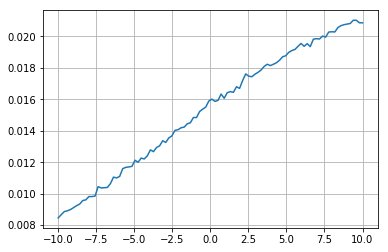

In [62]:
fig, a = plt.subplots()

DE_max =  10.0
DE_min = -10.0
partitions = 100

DE_grid_T10T11 = np.linspace(DE_min, DE_max, partitions)
P = kde_sklearn(np.array(T10T11), DE_grid_T10T11, bandwidth=0.1)
a.plot(DE_grid_T10T11, P)
plt.grid(True)
plt.show()

In [67]:
lim = int(partitions/2)
T1 = 1.0
T2 = 1.2

beta1 = 1.0/T1
beta2 = 1.0/T2

P_neg_Q_T10T11 = P[:lim][::-1] 
P_pos_Q_T10T11 = P[lim:]

DE_neg_grid_T10T11 = DE_grid_T10T11[:lim][::-1]
DE_pos_grid_T10T11 = DE_grid_T10T11[lim:]

log_Ps_T10T11 = np.log(P_pos_Q_T10T11/P_neg_Q_T10T11)

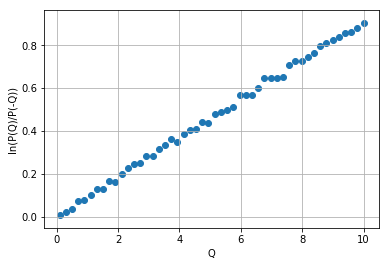

In [68]:
plt.scatter(DE_pos_grid_T10T11, log_Ps_T10T11)
plt.ylabel('ln(P(Q)/P(-Q))')
plt.xlabel('Q')
plt.grid(True)
plt.show()

In [69]:
model = LinearRegression(fit_intercept=True)
model.fit(DE_pos_grid.reshape(-1, 1), log_Ps)
print(model.coef_[0]) #slope
print(model.intercept_) #intercep
m_T10T11 = model.coef_[0]
b_T10T11 = model.intercept_

0.09101978567775589
0.0036863229139716958


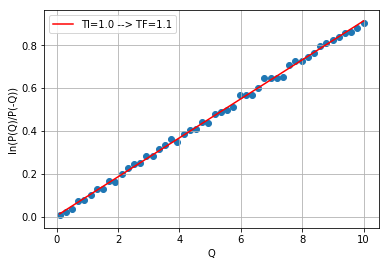

In [71]:
plt.scatter(DE_pos_grid, log_Ps, )
plt.plot(DE_pos_grid_T10T11, m_T10T11*DE_pos_grid_T10T11+b_T10T11, 'r-', linewidth=1.5, label='TI=1.0 --> TF=1.1')
plt.legend()
plt.ylabel('ln(P(Q)/P(-Q))')
plt.xlabel('Q')
plt.grid(True)
plt.show()

# T=1.0 ---> T=1.2

In [25]:
T10T12 = Restore_data('Delta_Energy_Temperature_v4_1.2.csv')

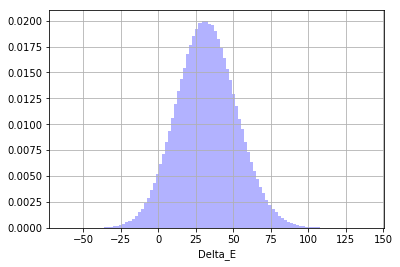

In [72]:
fig, ax = plt.subplots()
ax.hist(T10T12, 100, fc='blue', alpha=0.3, normed=True)
ax.set_xlabel('Delta_E')
plt.grid(True)
plt.show()

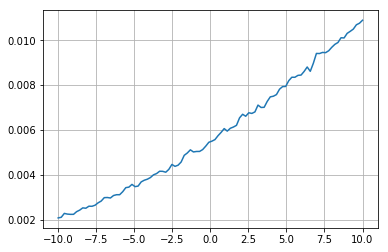

In [73]:
fig, a = plt.subplots()

DE_max =  10.0
DE_min = -10.0
partitions = 100

DE_grid_T10T12 = np.linspace(DE_min, DE_max, partitions)
P = kde_sklearn(np.array(T10T12), DE_grid_T10T12, bandwidth=0.1)
a.plot(DE_grid_T10T12, P)
plt.grid(True)
plt.show()

In [74]:
lim = int(partitions/2)
T1 = 1.0
T2 = 1.2

beta1 = 1.0/T1
beta2 = 1.0/T2

P_neg_Q_T10T12 = P[:lim][::-1] 
P_pos_Q_T10T12 = P[lim:]

DE_neg_grid_T10T12 = DE_grid_T10T12[:lim][::-1]
DE_pos_grid_T10T12 = DE_grid_T10T12[lim:]

log_Ps_T10T12 = np.log(P_pos_Q_T10T12/P_neg_Q_T10T12)

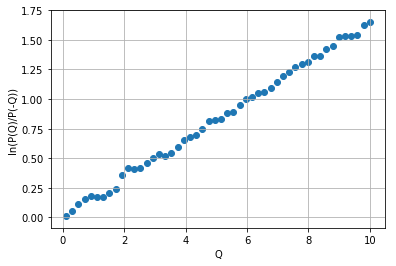

In [75]:
plt.scatter(DE_pos_grid_T10T12, log_Ps_T10T12)
plt.ylabel('ln(P(Q)/P(-Q))')
plt.xlabel('Q')
plt.grid(True)
plt.show()

In [76]:
model = LinearRegression(fit_intercept=True)
model.fit(DE_pos_grid_T10T12.reshape(-1, 1), log_Ps_T10T12)
print(model.coef_[0]) #slope
print(model.intercept_) #intercep
m_T10T12 = model.coef_[0]
b_T10T12 = model.intercept_

0.16453948014113304
0.0035120640510380996


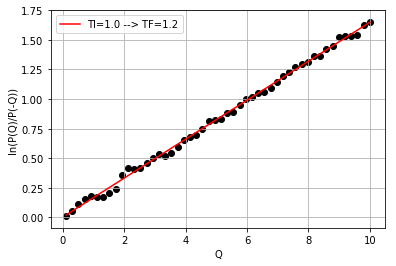

In [87]:
plt.scatter(DE_pos_grid_T10T12, log_Ps_T10T12, color='k')
plt.plot(DE_pos_grid_T10T12, m_T10T12*DE_pos_grid_T10T12+b_T10T12, 'r-', linewidth=1.5, label='TI=1.0 --> TF=1.2')
plt.legend()
plt.ylabel('ln(P(Q)/P(-Q))')
plt.xlabel('Q')
plt.grid(True)
plt.show()

# T=1.0 ---> T=0.8

In [26]:
T10T08 = Restore_data('Delta_Energy_Temperature_v4_0.8.csv')

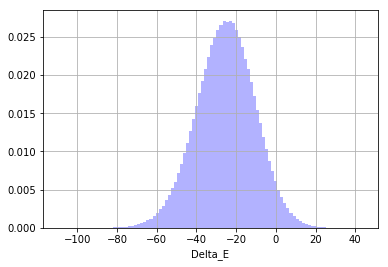

In [124]:
fig, ax = plt.subplots()
ax.hist(T10T08, 100, fc='blue', alpha=0.3, normed=True)
ax.set_xlabel('Delta_E')
plt.grid(True)
plt.show()

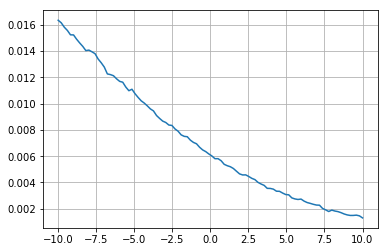

In [125]:
fig, a = plt.subplots()

DE_max =  10.0
DE_min = -10.0
partitions = 100

DE_grid_T10T08 = np.linspace(DE_min, DE_max, partitions)
P = kde_sklearn(np.array(T10T08), DE_grid_T10T08, bandwidth=0.1)
a.plot(DE_grid_T10T08, P)
plt.grid(True)
plt.show()

In [127]:
lim = int(partitions/2)
T1 = 1.0
T2 = 1.2

beta1 = 1.0/T1
beta2 = 1.0/T2

P_neg_Q_T10T08 = P[:lim][::-1] 
P_pos_Q_T10T08 = P[lim:]

DE_neg_grid_T10T08 = DE_grid_T10T08[:lim][::-1]
DE_pos_grid_T10T08 = DE_grid_T10T08[lim:]

log_Ps_T10T08 = np.log(P_pos_Q_T10T08/P_neg_Q_T10T08)

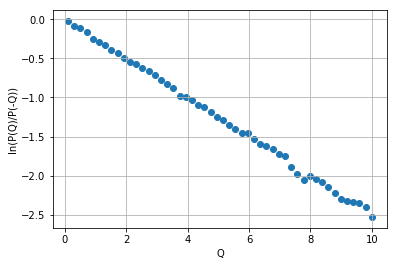

In [128]:
plt.scatter(DE_pos_grid_T10T08, log_Ps_T10T08)
plt.ylabel('ln(P(Q)/P(-Q))')
plt.xlabel('Q')
plt.grid(True)
plt.show()

In [129]:
model = LinearRegression(fit_intercept=True)
model.fit(DE_pos_grid_T10T08.reshape(-1, 1), log_Ps_T10T08)
print(model.coef_[0]) #slope
print(model.intercept_) #intercep
m_T10T08 = model.coef_[0]
b_T10T08 = model.intercept_

-0.25053406547974866
-0.0008890014708327065


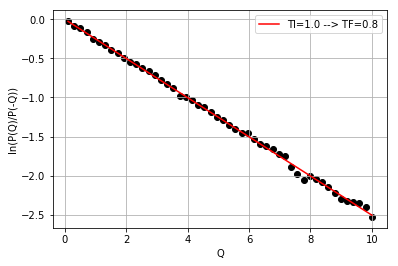

In [131]:
plt.scatter(DE_pos_grid_T10T08, log_Ps_T10T08, color='k')
plt.plot(DE_pos_grid_T10T08, m_T10T08*DE_pos_grid_T10T08+b_T10T08, 'r-', linewidth=1.5, label='TI=1.0 --> TF=0.8')
plt.legend()
plt.ylabel('ln(P(Q)/P(-Q))')
plt.xlabel('Q')
plt.grid(True)
plt.show()

# T=1.0 ---> T=0.9

In [24]:
T10T09 = Restore_data('Delta_Energy_Temperature_v4_0.9.csv')

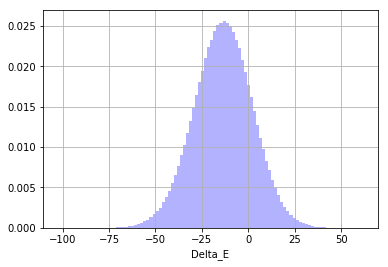

In [134]:
fig, ax = plt.subplots()
ax.hist(T10T09, 100, fc='blue', alpha=0.3, normed=True)
ax.set_xlabel('Delta_E')
plt.grid(True)
plt.show()

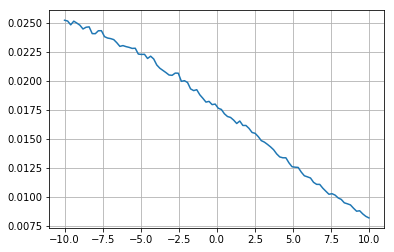

In [135]:
fig, a = plt.subplots()

DE_max =  10.0
DE_min = -10.0
partitions = 100

DE_grid_T10T09 = np.linspace(DE_min, DE_max, partitions)
P = kde_sklearn(np.array(T10T09), DE_grid_T10T09, bandwidth=0.1)
a.plot(DE_grid_T10T09, P)
plt.grid(True)
plt.show()

In [137]:
lim = int(partitions/2)
T1 = 1.0
T2 = 1.2

beta1 = 1.0/T1
beta2 = 1.0/T2

P_neg_Q_T10T09 = P[:lim][::-1] 
P_pos_Q_T10T09 = P[lim:]

DE_neg_grid_T10T09 = DE_grid_T10T09[:lim][::-1]
DE_pos_grid_T10T09 = DE_grid_T10T09[lim:]

log_Ps_T10T09 = np.log(P_pos_Q_T10T09/P_neg_Q_T10T09)

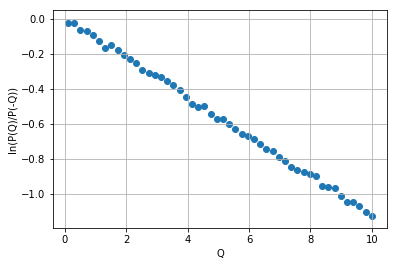

In [138]:
plt.scatter(DE_pos_grid_T10T09, log_Ps_T10T09)
plt.ylabel('ln(P(Q)/P(-Q))')
plt.xlabel('Q')
plt.grid(True)
plt.show()

In [139]:
model = LinearRegression(fit_intercept=True)
model.fit(DE_pos_grid_T10T09.reshape(-1, 1), log_Ps_T10T09)
print(model.coef_[0]) #slope
print(model.intercept_) #intercep
m_T10T09 = model.coef_[0]
b_T10T09 = model.intercept_

-0.112822594254596
0.0051015050440248455


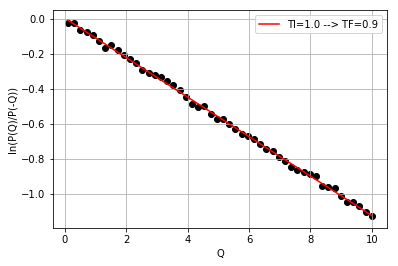

In [140]:
plt.scatter(DE_pos_grid_T10T09, log_Ps_T10T09, color='k')
plt.plot(DE_pos_grid_T10T09, m_T10T09*DE_pos_grid_T10T09+b_T10T09, 'r-', linewidth=1.5, label='TI=1.0 --> TF=0.9')
plt.legend()
plt.ylabel('ln(P(Q)/P(-Q))')
plt.xlabel('Q')
plt.grid(True)
plt.show()

# Grafica con todas las regresiones

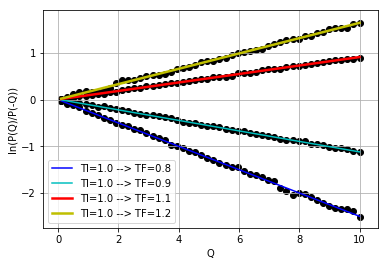

In [151]:
plt.scatter(DE_pos_grid_T10T08, log_Ps_T10T08, color='k')
plt.scatter(DE_pos_grid_T10T09, log_Ps_T10T09, color='k')
plt.scatter(DE_pos_grid_T10T11, log_Ps_T10T11, color='k')
plt.scatter(DE_pos_grid_T10T12, log_Ps_T10T12, color='k')
plt.plot(DE_pos_grid_T10T08, m_T10T08*DE_pos_grid_T10T08+b_T10T08, 'b-', linewidth=1.5, label='TI=1.0 --> TF=0.8')
plt.plot(DE_pos_grid_T10T09, m_T10T09*DE_pos_grid_T10T09+b_T10T09, 'c-', linewidth=1.5, label='TI=1.0 --> TF=0.9')
plt.plot(DE_pos_grid_T10T11, m_T10T11*DE_pos_grid_T10T11+b_T10T11, 'r-', linewidth=2.5, label='TI=1.0 --> TF=1.1')
plt.plot(DE_pos_grid_T10T12, m_T10T12*DE_pos_grid_T10T12+b_T10T12, 'y-', linewidth=2.5, label='TI=1.0 --> TF=1.2')
plt.legend()
plt.ylabel('ln(P(Q)/P(-Q))')
plt.xlabel('Q')
plt.grid(True)
plt.show()